In [25]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from collections import Counter
import ast # used for converting string lists to lists with string elements

## DATA WRANGLING

In [26]:
# Load cleaned datasets
movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv('data_cleaned/character_cleaned.csv')

for i in [movie_metadata, character_metadata]:
    i.columns = i.columns.str.replace(' ', '_')
    i.fillna(0, inplace=True)

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_7581/3977295388.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv('data_cleaned/movie_cleaned.csv', lineterminator='\n')


In [27]:
print("MOVIE DATA COLUMNS:\n",movie_metadata.columns,"\n\n","CHARACTER DATA COLUMNS:\n",character_metadata.columns)

MOVIE DATA COLUMNS:
 Index(['Unnamed:_0', 'Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_runtime', 'Movie_languages',
       'Movie_countries', 'Movie_genres', 'TMDB_id', 'TMDB_original_language',
       'TMDB_original_title', 'TMDB_overview', 'TMDB_popularity',
       'TMDB_release_date', 'TMDB_title', 'TMDB_vote_average',
       'TMDB_vote_count', 'TMDB_runtime', 'TMDB_budget', 'TMDB_IMDB_id',
       'TMDB_genres', 'Movie_box_office_revenue', 'Movie_release_year',
       'log_Movie_box_office_revenue', 'log_Movie_release_year'],
      dtype='object') 

 CHARACTER DATA COLUMNS:
 Index(['Unnamed:_0', 'Wikipedia_Movie_ID', 'Freebase_Movie_ID',
       'Movie_release_date', 'Character_name', 'Actor_DOB', 'Actor_gender',
       'Actor_height', 'Actor_ethnicity', 'Actor_name',
       'Actor_age_at_movie_release', 'Freebase_character_map',
       'Freebase_character_ID', 'Freebase_actor_ID', 'Movie_release_year',
       'Actor_birth_year', 'log_M

## Kavus wrangling and regression

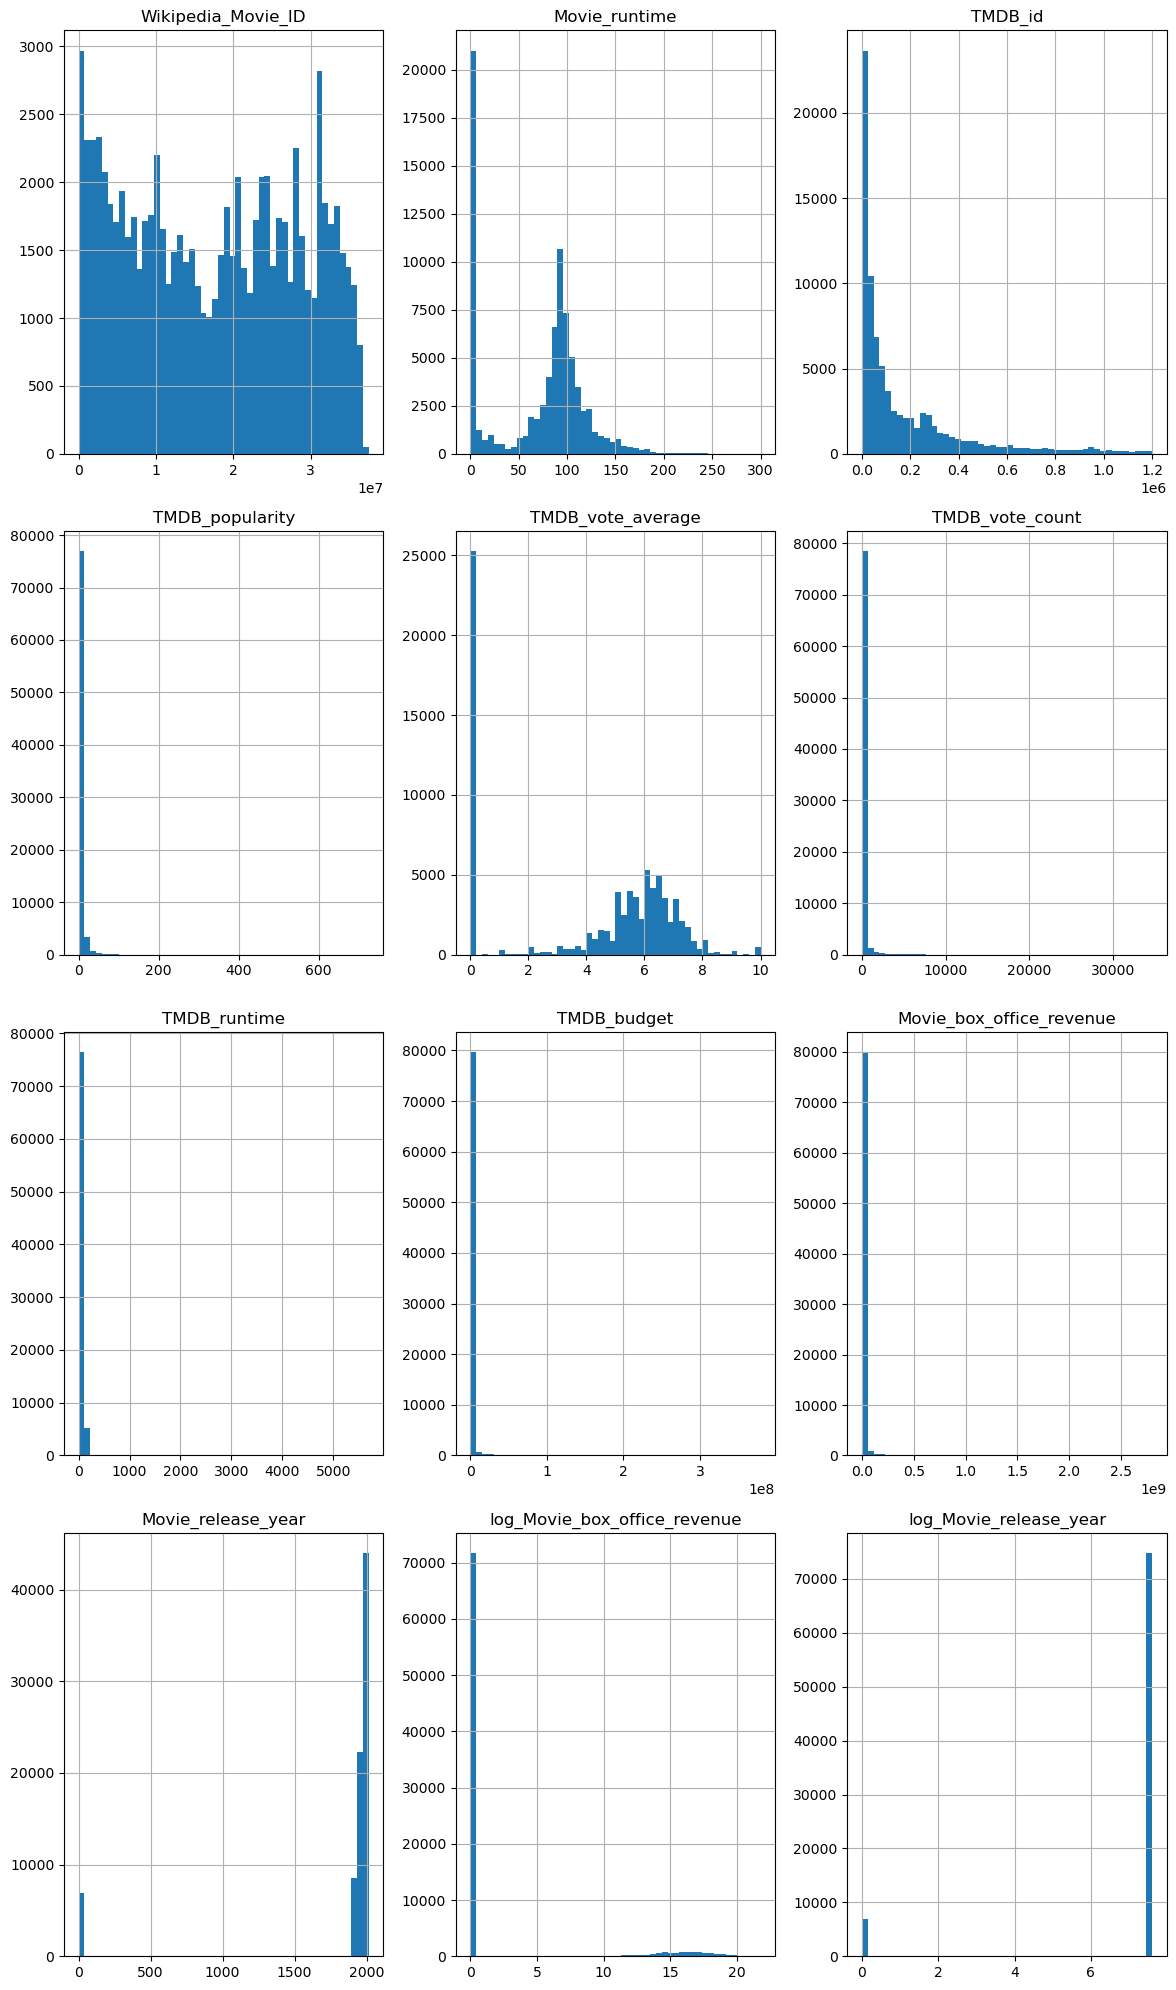

In [28]:
# Select only numeric columns
numeric_columns = movie_metadata.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns dynamically
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols -1

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns[1:]):
    row, col_index = divmod(i, num_cols)
    movie_metadata[col].hist(ax=axes[row, col_index], bins=50)
    axes[row, col_index].set_title(col)



# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# # Select only numeric columns
# numeric_columns = character_metadata.select_dtypes(include=['number']).columns

# # Calculate the number of rows and columns dynamically
# num_cols = 3
# num_rows = (len(numeric_columns) + num_cols - 1) // num_cols -1

# # Increase figure size and adjust layout
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# # Plot histograms for each numeric column
# for i, col in enumerate(numeric_columns[1:]):
#     row, col_index = divmod(i, num_cols)
#     character_metadata[col].hist(ax=axes[row, col_index], bins=50)
#     axes[row, col_index].set_title(col)



# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

In [30]:
print(character_metadata.shape, movie_metadata.shape)

(450669, 17) (81741, 26)


In [31]:
threshold = 0  # Set your threshold value

for col in ["log_Movie_box_office_revenue", "TMDB_vote_average"]:
    # Count the number of elements under the threshold
    below_threshold_count = len(movie_metadata[movie_metadata[col] == threshold])

    # Calculate the total number of elements in the column
    total_elements = len(movie_metadata[col])

    # Calculate the proportion
    proportion_below_threshold = below_threshold_count / total_elements

    # Print the result
    print(f"Elements equal to 0 in column {col}: number = {below_threshold_count} which is {proportion_below_threshold:.2%}")

Elements equal to 0 in column log_Movie_box_office_revenue: number = 71728 which is 87.75%
Elements equal to 0 in column TMDB_vote_average: number = 25257 which is 30.90%


In [32]:
movie_metadata_filtered = movie_metadata[movie_metadata["log_Movie_box_office_revenue"] > 0]
movie_metadata_filtered.dropna(inplace=True)

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_7581/1711127158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_metadata_filtered.dropna(inplace=True)


In [33]:
for col in ["log_Movie_box_office_revenue", "TMDB_vote_average"]:
    # Count the number of elements under the threshold
    below_threshold_count = len(movie_metadata_filtered[movie_metadata_filtered[col] == threshold])

    # Calculate the total number of elements in the column
    total_elements = len(movie_metadata_filtered[col])

    # Calculate the proportion
    proportion_below_threshold = below_threshold_count / total_elements

    # Print the result
    print(f"Elements equal to 0 in column {col}: number = {below_threshold_count} which is {proportion_below_threshold:.2%}")

Elements equal to 0 in column log_Movie_box_office_revenue: number = 0 which is 0.00%
Elements equal to 0 in column TMDB_vote_average: number = 283 which is 2.83%


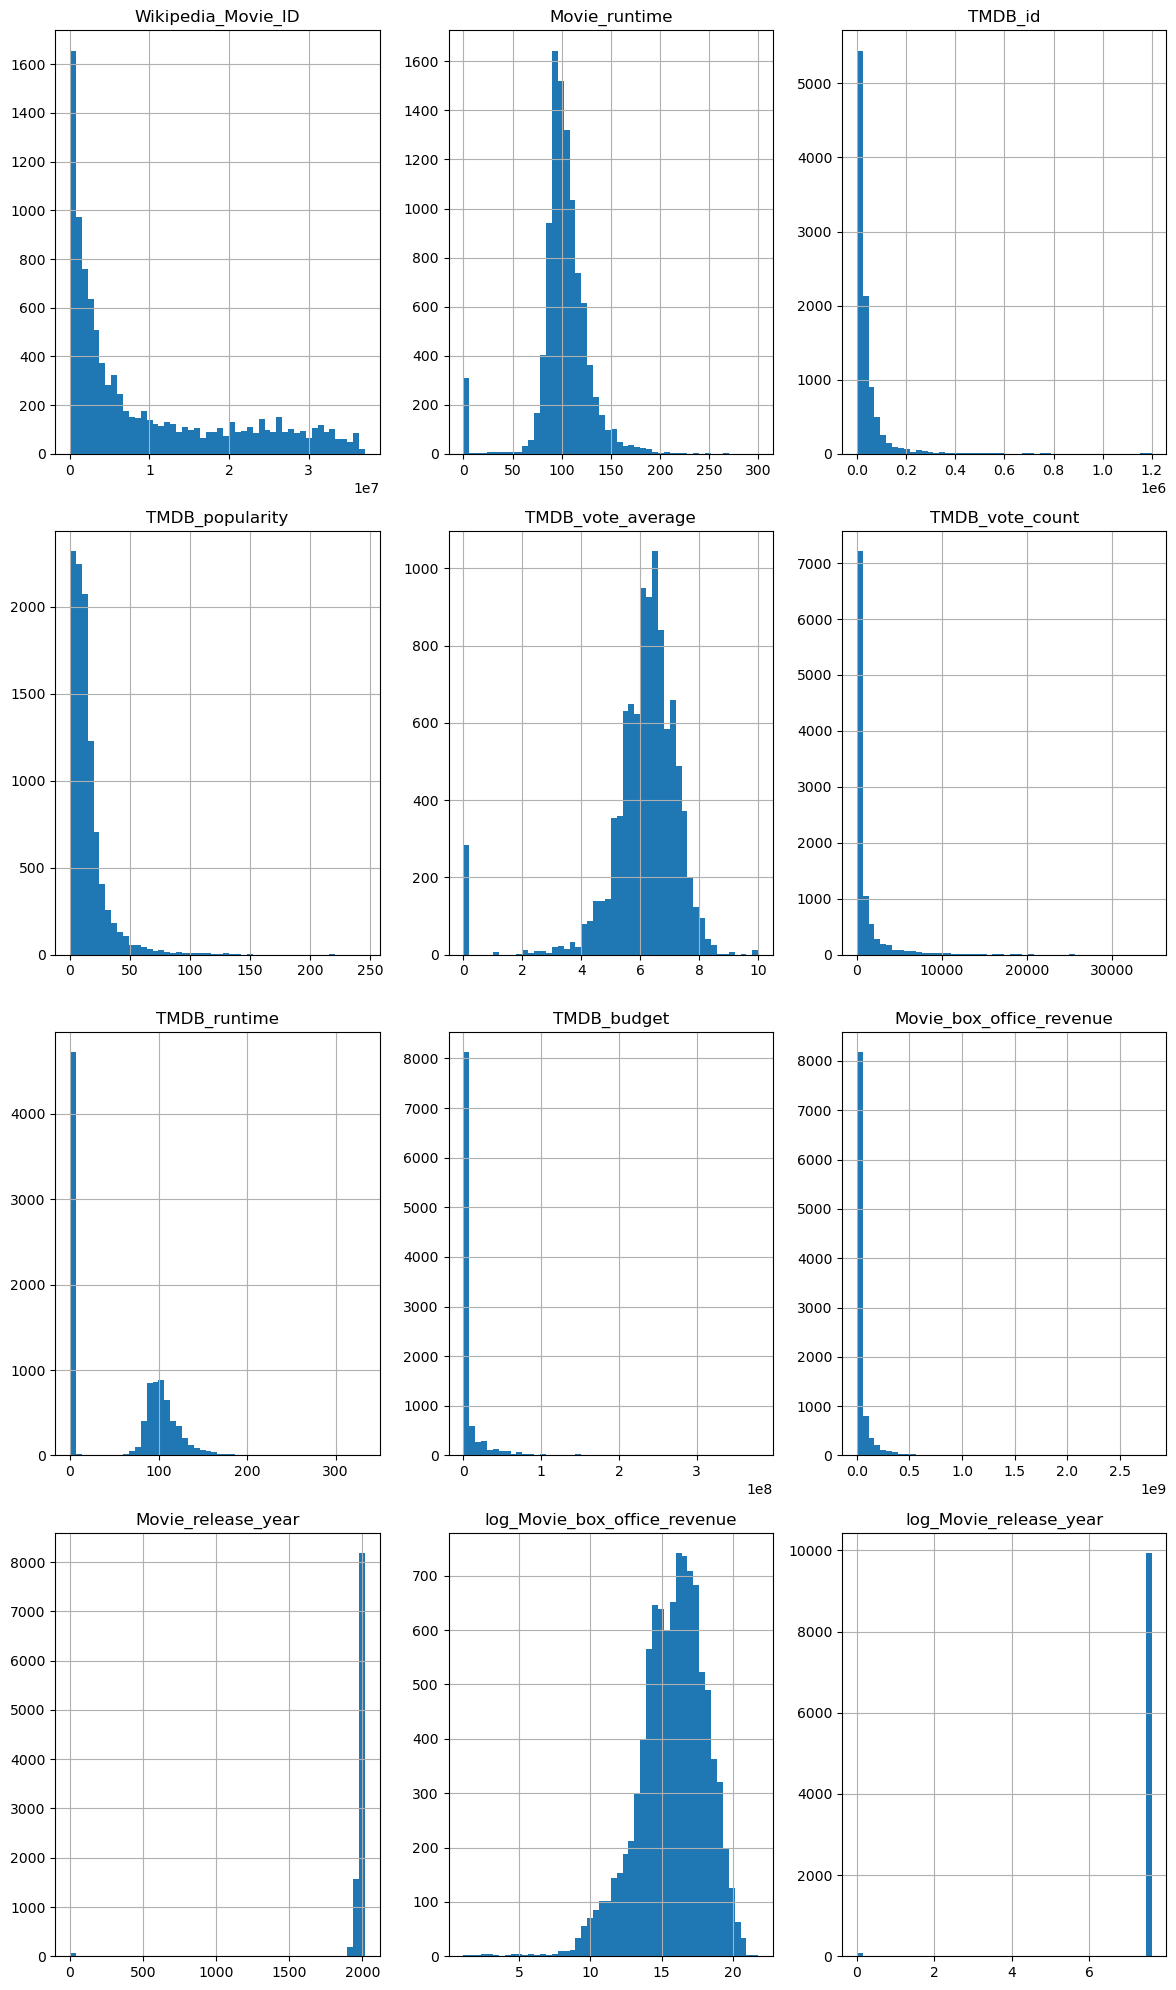

In [34]:
# Select only numeric columns
numeric_columns = movie_metadata_filtered.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns dynamically
num_cols = 3
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols -1

# Increase figure size and adjust layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns[1:]):
    row, col_index = divmod(i, num_cols)
    movie_metadata_filtered[col].hist(ax=axes[row, col_index], bins=50)
    axes[row, col_index].set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

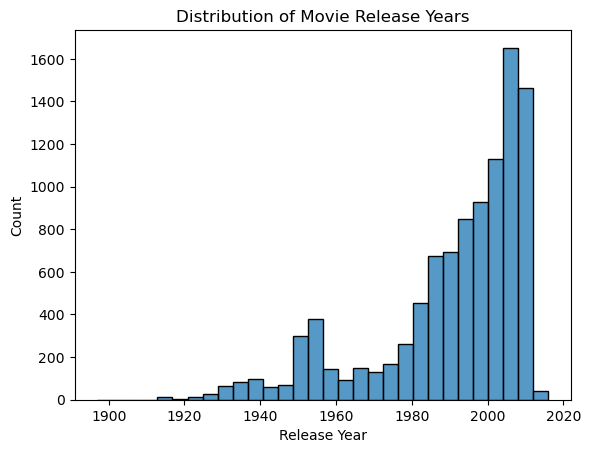

In [35]:
movie_metadata_filtered = movie_metadata_filtered[movie_metadata_filtered["Movie_release_year"] > 1800]
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming movie_metadata_filtered is your DataFrame
sns.histplot(movie_metadata_filtered["Movie_release_year"], bins=30, kde=False)
plt.title("Distribution of Movie Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

In [36]:
movie_reg_data = movie_metadata_filtered[['Movie_release_date', 'Movie_runtime', 'Movie_languages',
       'Movie_countries', 'Movie_genres', 'Movie_release_year',
       'log_Movie_box_office_revenue', 'TMDB_vote_average']]
# Select numeric columns
numeric_columns = ['Movie_runtime', 'Movie_release_year', 'log_Movie_box_office_revenue']

# Use zscore to standardize the selected numeric columns
movie_metadata[numeric_columns] = stats.zscore(movie_metadata_filtered[numeric_columns])

In [37]:
# ast.literal_eval("['Thriller', 'Horror']) will output the list ['Thriller', 'Horror']
categorical_columns = ['Movie_languages','Movie_countries', 'Movie_genres']

for column in categorical_columns:
    print(movie_reg_data[column][0],"\n", type(movie_reg_data[column][0]))
    movie_reg_data.loc[:, column] = movie_reg_data[column].apply(lambda x: ast.literal_eval(x))

print(movie_reg_data[categorical_columns])

['English'] 
 <class 'str'>
['United States of America'] 
 <class 'str'>
['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'] 
 <class 'str'>
          Movie_languages                     Movie_countries  \
0               [English]          [United States of America]   
7               [English]          [United States of America]   
13              [English]                    [United Kingdom]   
17              [English]          [United States of America]   
21              [English]          [United States of America]   
...                   ...                                 ...   
81695           [English]          [United States of America]   
81720           [English]          [United States of America]   
81725  [Italian, English]  [France, United States of America]   
81726                  []          [United States of America]   
81732                  []                                  []   

                                

In [38]:
#Check if converted to list
for column in categorical_columns:
    print(movie_reg_data[column][0],"\n", type(movie_reg_data[column][0]))

['English'] 
 <class 'list'>
['United States of America'] 
 <class 'list'>
['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western'] 
 <class 'list'>


In [39]:
categorical_columns = ['Movie_genres', 'Movie_languages', 'Movie_countries']

all_genres = {}
all_languages = {}
all_countries = {}

for col in categorical_columns:
    # Iterate over the values in the column
    for list_element in movie_reg_data[col]:
        # Iterate over each element in the list
        for element in list_element:
            # Increment the count for the element in the respective dictionary
            if col == 'Movie_languages':
                all_languages[element] = all_languages.get(element, 0) + 1
            elif col == 'Movie_countries':
                all_countries[element] = all_countries.get(element, 0) + 1
            elif col == "Movie_genres":
                all_genres[element] = all_genres.get(element, 0) + 1

# Print the top N genres with the highest occurrences for each column
for occurrence_dict, column_name in zip([all_genres, all_languages, all_countries], categorical_columns):
    n = 10
    # Get the top N items with the highest occurrences (in descending order)
    top_n = sorted(occurrence_dict.items(), key=lambda x: x[1], reverse=True)[:n]

    print(f"\n\nTop {n} {column_name} with the highest occurrences:")
    for i, count in top_n:
        print(f"{i}: {count} occurrences")



Top 10 Movie_genres with the highest occurrences:
Drama: 5109 occurrences
Comedy: 3615 occurrences
Romance Film: 2317 occurrences
Thriller: 2291 occurrences
Action: 2032 occurrences
Action/Adventure: 1545 occurrences
Crime Fiction: 1478 occurrences
Adventure: 1298 occurrences
Indie: 1251 occurrences
Romantic comedy: 991 occurrences


Top 10 Movie_languages with the highest occurrences:
English: 8406 occurrences
French: 644 occurrences
Spanish: 512 occurrences
German: 320 occurrences
Italian: 301 occurrences
Japanese: 288 occurrences
Korean: 260 occurrences
Russian: 213 occurrences
Standard Mandarin: 158 occurrences
Hindi: 135 occurrences


Top 10 Movie_countries with the highest occurrences:
United States of America: 7722 occurrences
United Kingdom: 1150 occurrences
France: 640 occurrences
Germany: 525 occurrences
Canada: 384 occurrences
South Korea: 289 occurrences
Japan: 270 occurrences
Italy: 225 occurrences
Australia: 215 occurrences
India: 214 occurrences


In [40]:
movie_reg_data

,Movie_release_date,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,log_Movie_box_office_revenue,TMDB_vote_average
0,2001-08-24,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,16.455341,5.123
7,1938-08-16,106.0,[English],[United States of America],"[Musical, Comedy, Black-and-white]",1938.0,15.096444,6.600
13,1989-11-08,137.0,[English],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",1989.0,16.134077,7.213
17,1964-08-27,139.0,[English],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",1964.0,18.443154,7.571
21,1999-10-01,92.0,[English],[United States of America],"[Thriller, Science Fiction, Future noir, Indie...",1999.0,9.976784,5.200
...,...,...,...,...,...,...,...,...
81695,1988-06-29,117.0,[English],[United States of America],"[Romantic comedy, Comedy of manners, Drama, Co...",1988.0,19.481080,6.867
81720,1990,100.0,[English],[United States of America],"[Alien Film, Science Fiction, Family Film, Com...",1990.0,16.547900,4.881
81725,2000-08-26,106.0,"[Italian, English]","[France, United States of America]","[Parody, Americana, Comedy]",2000.0,15.753456,6.327
81726,1993-06-04,107.0,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri...",1993.0,16.946046,5.700


In [41]:
formula_revenue = 'log_Movie_box_office_revenue ~ Movie_runtime + Movie_release_year'
formula_rating = 'TMDB_vote_average ~ Movie_runtime + Movie_release_year'
formula_both = 'log_Movie_box_office_revenue + TMDB_vote_average ~ Movie_runtime + Movie_release_year'
# top n occurring elements in categorical columns
n = 10
print(movie_reg_data.shape)
for col in categorical_columns:
    # Flatten the lists, handling NaN values
    flattened_values = [item for sublist in movie_reg_data[col].apply(lambda x: x if isinstance(x, list) else []).dropna() for item in sublist]

    # Count occurrences of each element
    element_counts = pd.Series(flattened_values).value_counts()

    # Select the top 10 most occurring elements
    top_elements = element_counts.head(n).index.tolist()

    # Create dummy variables only for the top 10 elements
    dummy_variables = pd.get_dummies(pd.Series(flattened_values).apply(lambda x: x if x in top_elements else 'Other'))

    # # Rename the dummy columns to avoid conflicts
    dummy_variables.columns = dummy_variables.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

    # Use the I() function to handle special characters in column names
    dummy_variables.columns = [f"{col}_{element}" for element in dummy_variables.columns]
    
    # Reset index before concatenation
    movie_reg_data = movie_reg_data.reset_index(drop=True)
    
    # Add dummy variables to the formula
    formula_revenue += ' + ' + ' + '.join(dummy_variables.columns)
    formula_rating += ' + ' + ' + '.join(dummy_variables.columns)
    formula_both += ' + ' + ' + '.join(dummy_variables.columns)
    
    # Merge the dummy variables with the original DataFrame
    movie_reg_data = pd.merge(movie_reg_data, dummy_variables, left_index=True, right_index=True)

# Print the updated formula
print(formula_revenue,
     "\n\n", formula_rating,
     "\n\n", formula_both, dummy_variables.shape, movie_reg_data.shape)

(9939, 8)
log_Movie_box_office_revenue ~ Movie_runtime + Movie_release_year + Movie_genres_Action + Movie_genres_Action_Adventure + Movie_genres_Adventure + Movie_genres_Comedy + Movie_genres_Crime_Fiction + Movie_genres_Drama + Movie_genres_Indie + Movie_genres_Other + Movie_genres_Romance_Film + Movie_genres_Romantic_comedy + Movie_genres_Thriller + Movie_languages_English + Movie_languages_French + Movie_languages_German + Movie_languages_Hindi + Movie_languages_Italian + Movie_languages_Japanese + Movie_languages_Korean + Movie_languages_Other + Movie_languages_Russian + Movie_languages_Spanish + Movie_languages_Standard_Mandarin + Movie_countries_Australia + Movie_countries_Canada + Movie_countries_France + Movie_countries_Germany + Movie_countries_India + Movie_countries_Italy + Movie_countries_Japan + Movie_countries_Other + Movie_countries_South_Korea + Movie_countries_United_Kingdom + Movie_countries_United_States_of_America 

 TMDB_vote_average ~ Movie_runtime + Movie_release

In [42]:
print(movie_reg_data.shape, movie_metadata_filtered.shape, movie_metadata.shape)

(9939, 41) (9939, 26) (81741, 26)


In [43]:
model_revenue = smf.ols(formula=formula_revenue, data=movie_reg_data)
model_rating = smf.ols(formula=formula_rating, data=movie_reg_data)

In [44]:
np.random.seed(2)

# Fit the model
res_revenue = model_revenue.fit()
res_rating = model_rating.fit()

print(res_revenue.summary(),
      res_rating.summary())

                                 OLS Regression Results                                 
Dep. Variable:     log_Movie_box_office_revenue   R-squared:                       0.072
Model:                                      OLS   Adj. R-squared:                  0.069
Method:                           Least Squares   F-statistic:                     24.10
Date:                          Wed, 13 Dec 2023   Prob (F-statistic):          8.41e-136
Time:                                  17:13:20   Log-Likelihood:                -22486.
No. Observations:                          9939   AIC:                         4.504e+04
Df Residuals:                              9906   BIC:                         4.528e+04
Df Model:                                    32                                         
Covariance Type:                      nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_7581/3154726004.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Name', data=significant_coeff_df, palette='viridis')


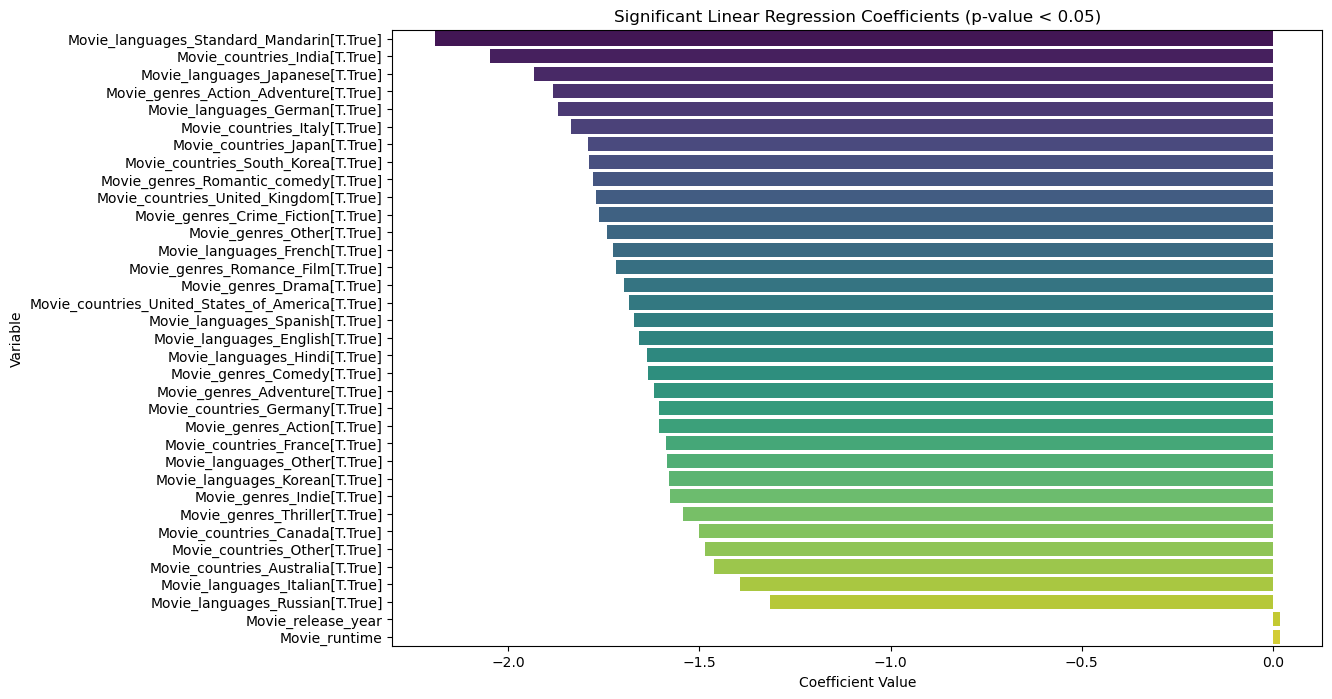

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_7581/3154726004.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Name', data=significant_coeff_df, palette='viridis')


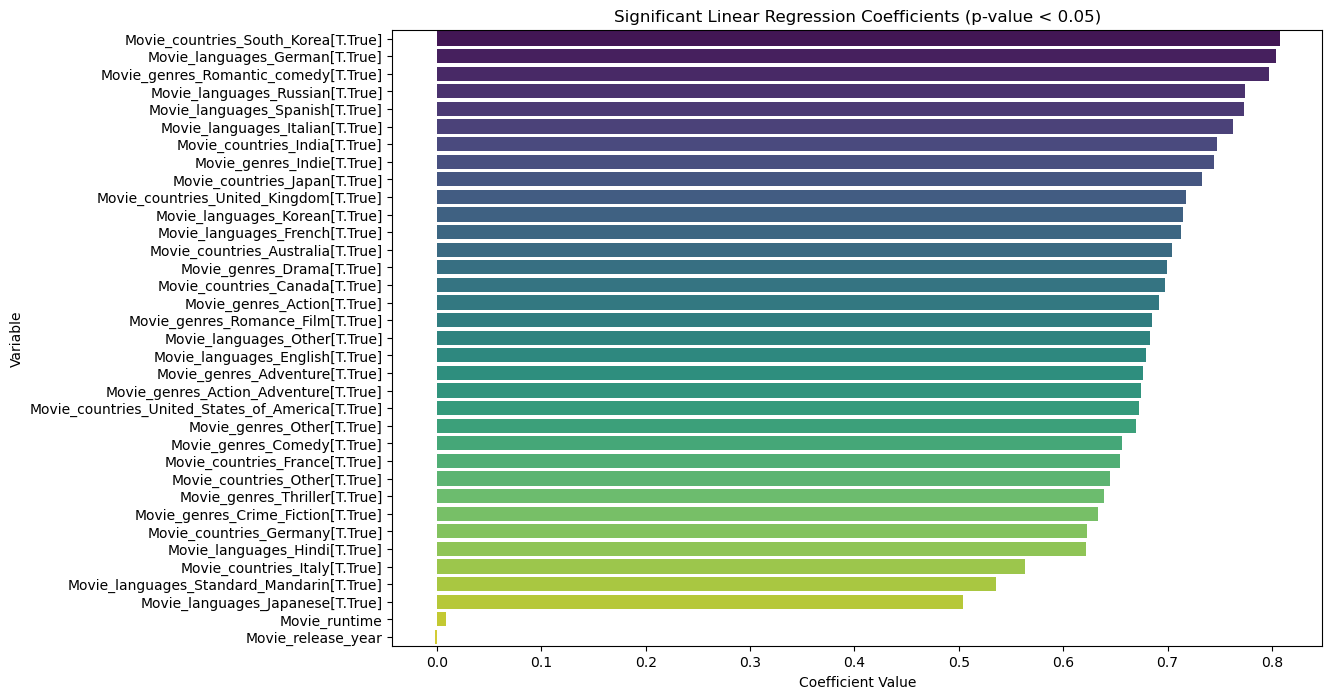

In [45]:
for res in [res_revenue, res_rating]:
# Extract
    coefficients = res.params
    p_values = res.pvalues
    coeff_names = coefficients.index

    # Create a DataFrame for better plotting
    coeff_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values, 'Name': coeff_names})

    # Exclude the intercept from the DataFrame
    coeff_df = coeff_df[coeff_df['Name'] != 'Intercept']

    # Filter coefficients with p-value < 0.05
    significant_coeff_df = coeff_df[coeff_df['P-Value'] < 0.05]

    # Sort coefficients by magnitude for better visualization
    significant_coeff_df = significant_coeff_df.reindex(significant_coeff_df['Coefficient'].abs().sort_values(ascending=False).index)

    # Plot significant coefficients
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Name', data=significant_coeff_df, palette='viridis')
    plt.title('Significant Linear Regression Coefficients (p-value < 0.05)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Variable')
    plt.show()